# Tarea : Aplicaciones de algoritmos bioinspirados 

<a href="https://colab.research.google.com/github/milocortes/mod_04_concentracion/blob/ccm-2023/src/tareas/tarea_aplicaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Instalamos el paquete algo_optim_mod04
# En este paquete se encuentran los algoritmos:
#   * Steepest descent
#   * Genético con codificiación binaria
#   * PSO

!pip install git+https://github.com/milocortes/algo_optim_mod04.git@main

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/milocortes/algo_optim_mod04.git (to revision main) to /tmp/pip-req-build-zh7y8xi9
  Running command git clone --filter=blob:none --quiet https://github.com/milocortes/algo_optim_mod04.git /tmp/pip-req-build-zh7y8xi9
  Resolved https://github.com/milocortes/algo_optim_mod04.git to commit 321d484a3a0c6d8120bc3d1d8713a3c308223d0c
  Preparing metadata (setup.py) ... done
  Created wheel for algo-optim-mod04: filename=algo_optim_mod04-0.0.1-py3-none-any.whl size=22333 sha256=905c1c472fe6742255bbdaea357f30ac70c6955060065538659c986e7c5325a1
  Stored in directory: /tmp/pip-ephem-wheel-cache-q7ql456i/wheels/0d/3b/47/fec08866ee7698ec07d352844f59158f3cd55f691110bf2a1c
Successfully built algo-optim-mod04


In [9]:
# Cargamos nuestro paquete 
from algo_optim_mod04.bioinspirados import genetico_binario, PSO 

ModuleNotFoundError: ignored

In [ ]:
# Revisamos los argumentos de la función genetico_binario
print(genetico_binario.__doc__)


    ------------------------------------------
                        
            Genetic Binary Algorithm 
    -------------------------------------------
    # Inputs:
        * f             - Función a minimizar
        * N             - Número de individuos en la población
        * generaciones  - Cantidad máxima de generaciones 
        * n_variables   - Número de variables de decisión
        * ub            - Lista de límites superiores de las variables de decisión
        * lb            - Lista de límites inferiores de las variables de decisión
        * precision     - Precisión de las variables de decisión
        * prob_cruza    - Probabilidad de cruza

    # Output
        * mejor_vector   - Mejor solución encontrada
        * mejor_valor    - Mejor valor de la función objetivo
        * fitness_values - Mejores valores de fitness  
    


In [ ]:
# Revisamos los argumentos de la función PSO
print(PSO.__doc__)


    ------------------------------------------
                        PSO
    Particle Swarm Optimization
    -------------------------------------------
    # Inputs:
        * f             - Función a minimizar
        * pop_size      - Número de individuos en la población
        * generaciones  - Número de generaciones
        * n_var         - Número de variables de decisión
        * ub            - Lista de límites superiores de las variables de decisión
        * lb            - Lista de límites inferiores de las variables de decisión
        * α             - Parámetro de aprendizaje Social
        * β             - Parámetro de aprendizaje Cognitivo 
        * w             - Velocidad de inercia
        
    # Output
        * x_best         - Mejor solución encontrada
        * y_best         - Mejor valor de la función objetivo
        * fitness_values - Mejores valores de fitness
    


# Probemos las funciones en la ya conocida función Himmelblau

$$
f(x,y) = (x^2 + y -11)^2 + (x + y^2 -7)^2
$$

* Mínimos locales:
$$
\begin{align}
	\min \begin{cases} 
      f(3.0,2.0) &= 0 \\
      f(-2.805118,3.131312) &=0 \\
      f(-3.779310,-3.283186) &=0\\
	  f(3.584428,-1.848126)&=0
   \end{cases}
\end{align}
$$

* Espacio de búsqueda:

$$
-5 \leq x,y \leq 5
$$


/tmp/ipykernel_432430/1165348931.py:23: UserWarning: Log scale: values of z <= 0 have been masked
  cp = ax.contourf(X, Y, Z, locator=ticker.LogLocator(base = 2), cmap=cm.PuBu_r)


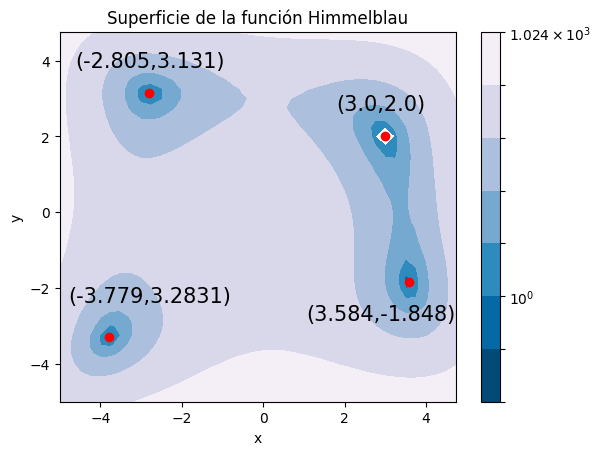

In [ ]:
# Graficamos la gráfica de contorno de la función de la Himmelblau

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import ticker, cm

import pandas as pd 

# Función a minimizar
def f_himmelblau(X):
  x,y = X
  return (x**2 + y -11)**2 + (x + y**2 -7)**2

# Generamos valores para Y y X.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X**2 + Y -11)**2 + (X + Y**2 -7)**2


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, locator=ticker.LogLocator(base = 2), cmap=cm.PuBu_r)
fig.colorbar(cp)
### Agregamos lo mínimos
plt.plot(3.0,2.0,color='red',marker='o')
plt.plot(-2.805118,3.131312,color='red',marker='o')
plt.plot(-3.779310,-3.283186,color='red',marker='o')
plt.plot(3.584428,-1.848126,color='red',marker='o')

ax.annotate('(3.0,2.0)', xy =(1.8,2.7),fontsize=15)
ax.annotate('(-2.805,3.131)', xy =(-4.605118,3.831312),fontsize=15)
ax.annotate('(-3.779,3.2831)', xy =(-4.779310,-2.383186),fontsize=15)
ax.annotate('(3.584,-1.848)', xy =(1.0584428,-2.848126),fontsize=15)
  
    
ax.set_title('Superficie de la función Himmelblau')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [ ]:
# Parámetros comunes a ambos algoritmos

n_poblacion = 300
n_variables = 2
upper_bounds = [5, 5]
lower_bounds = [-5, -5]
generaciones = 100

# Parámetros especificos al Genético Binario

precision = 6
pro_cruza = 0.8

# Parámetros especificos a PSO
parametro_social = 0.8
parametro_cognitivo = 0.8
inercia = 0.5

In [ ]:
"""
#####################
### GENETICO BINARIO
#####################
"""
x_best_genetico, y_best_genetico, fitness_genetico = genetico_binario(f_himmelblau, n_poblacion, generaciones,
                                                     n_variables, upper_bounds, lower_bounds, 
                                                     precision, pro_cruza)
x_best_genetico


[5, 5]
Evaluación de la población inicial
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 20
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 40
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 60
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 80
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------


[3.007544160338888, 1.9927672739486262]

In [ ]:

"""
############
###   PSO
############
"""

x_best_pso, y_best_pso, fitness_pso  = PSO(f_himmelblau, n_poblacion, generaciones, n_variables, 
                              upper_bounds, lower_bounds, parametro_social, 
                              parametro_cognitivo, inercia)
x_best_pso

-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 20
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 40
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 60
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 80
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------


array([3., 2.])

Text(0.5, 1.0, 'Comparación de algoritmos de optimización')

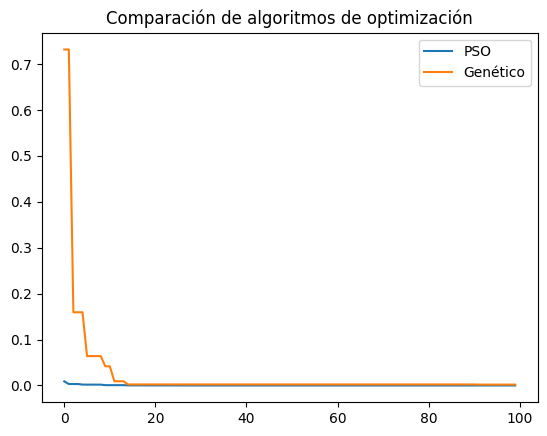

In [ ]:
# Comparamos el fitness de los algoritmos
import matplotlib.pyplot as plt 

plt.plot(range(generaciones), fitness_pso, label ="PSO")
plt.plot(range(generaciones), fitness_genetico, label ="Genético")

plt.legend()
plt.title("Comparación de algoritmos de optimización")

In [ ]:
# Seleccionamos el mejor vector
min_value = 100000
x_best = None
algo_best = None

for algo,x in zip(["Genético","PSO"],[x_best_genetico,x_best_pso]):
    if f_himmelblau(x) < min_value:
        min_value = f_himmelblau(x)
        x_best = x
        algo_best = algo
print(f"El valor mínimo de la función es {min_value}\nEl mejor vector fue el del algoritmo {algo_best}\nx_best: {x_best}")


El valor mínimo de la función es 3.1739657184523935e-20
El mejor vector fue el del algoritmo PSO
x_best: [3. 2.]


### Eggholder

Minimiza la función Eggholder:

$$
f(x,y) = -(y+47) \sin \sqrt{\Big| \dfrac{x}{2} + (y +47) \Big|} -  x \sin \sqrt{\Big| x - (y +47) \Big|}
$$

* Mínimos locales:
$$
\begin{align}
      f(512, 404.2319) &= -959.6407
\end{align}
$$

* Espacio de búsqueda:

$$
-512 \leq x,y \leq 512
$$



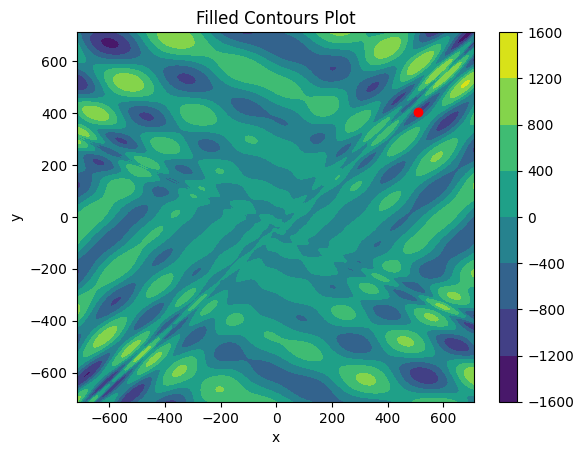

In [ ]:
def eggholder(X):
    x,y = X
    return -(y+47) * np.sin(np.sqrt(abs( (x/2) + (y+47) ))) - x*np.sin( np.sqrt( abs(x - (y+47))))

# Generamos valores para Y y X.
X = np.arange(-715, 712, 1)
Y = np.arange(-712, 712, 1)
X, Y = np.meshgrid(X, Y)
Z =  -(Y+47) * np.sin(np.sqrt(abs( (X/2) + (Y+47) ))) - X*np.sin( np.sqrt( abs(X - (Y+47))))

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.plot(510,404,color='red',marker='o')
plt.show()

In [ ]:
# Parámetros comunes a ambos algoritmos
n_poblacion = 300
n_variables = 2
upper_bounds = [512, 512]
lower_bounds = [-512, -512]
generaciones = 100


# Parámetros especificos a PSO
parametro_social = 0.8
parametro_cognitivo = 0.8
inercia = 0.5


"""
############
###   PSO
############
"""

x_best_pso, y_best_pso, fitness_pso  = PSO(eggholder, n_poblacion, generaciones, n_variables, 
                              upper_bounds, lower_bounds, parametro_social, 
                              parametro_cognitivo, inercia)
x_best_pso

-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 20
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 40
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 60
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 80
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------


array([512.        , 404.23180535])

In [ ]:
"""
#####################
### GENETICO BINARIO
#####################
"""

# Parámetros especificos al Genético Binario
precision = 6
pro_cruza = 0.8



x_best_genetico, y_best_genetico, fitness_genetico = genetico_binario(eggholder, n_poblacion, generaciones,
                                                     n_variables, upper_bounds, lower_bounds, 
                                                     precision, pro_cruza)
x_best_genetico

[512, 512]
Evaluación de la población inicial
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 20
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 40
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 60
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 80
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------


[443.1946420028755, 460.92234702121686]

Text(0.5, 1.0, 'Comparación de algoritmos de optimización')

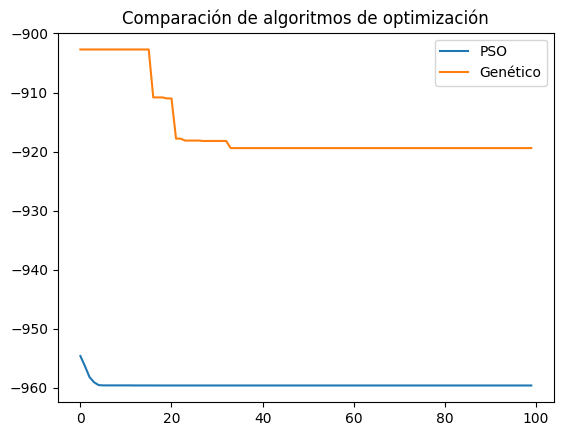

In [ ]:
# Comparamos el fitness de los algoritmos
import matplotlib.pyplot as plt 

plt.plot(range(generaciones), fitness_pso, label ="PSO")
plt.plot(range(generaciones), fitness_genetico, label ="Genético")

plt.legend()
plt.title("Comparación de algoritmos de optimización")

In [ ]:
# Seleccionamos el mejor vector
min_value = 100000
x_best = None
algo_best = None

for algo,x in zip(["Genético","PSO"],[x_best_genetico,x_best_pso]):
    if eggholder(x) < min_value:
        min_value = eggholder(x)
        x_best = x
        algo_best = algo
print(f"El valor mínimo de la función es {min_value}\nEl mejor vector fue el del algoritmo {algo_best}\nx_best: {x_best}")


El valor mínimo de la función es -959.640662720851
El mejor vector fue el del algoritmo PSO
x_best: [512.         404.23180535]


# TAREA

Para las siguientes funciones de prueba*:

* Easom
* Cross-in-tray
* Ackley
* Booth

Utiliza los algoritmos Genético Binario y PSO para encontrar el que tiene mejor desempeño para minimizar dichas funciones. 

Realice una visualización del desempeño de cada algoritmo para cada función.


*Para la implementación de las funciones de prueba siga la liga de wikipedia vista en clase:

https://en.wikipedia.org/wiki/Test_functions_for_optimization

In [11]:
# Instalamos el paquete algo_optim_mod04
# En este paquete se encuentran los algoritmos:
#   * Steepest descent
#   * Genético con codificiación binaria
#   * PSO

!pip install git+https://github.com/milocortes/algo_optim_mod04.git@main

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/milocortes/algo_optim_mod04.git (to revision main) to /tmp/pip-req-build-hh5z8xto
  Running command git clone --filter=blob:none --quiet https://github.com/milocortes/algo_optim_mod04.git /tmp/pip-req-build-hh5z8xto
  Resolved https://github.com/milocortes/algo_optim_mod04.git to commit 321d484a3a0c6d8120bc3d1d8713a3c308223d0c
  Preparing metadata (setup.py) ... done


In [12]:
# Cargamos nuestro paquete 
from algo_optim_mod04.bioinspirados import genetico_binario, PSO 

In [13]:
# Revisamos los argumentos de la función genetico_binario
print(genetico_binario.__doc__)


    ------------------------------------------
                        
            Genetic Binary Algorithm 
    -------------------------------------------
    # Inputs:
        * f             - Función a minimizar
        * N             - Número de individuos en la población
        * generaciones  - Cantidad máxima de generaciones 
        * n_variables   - Número de variables de decisión
        * ub            - Lista de límites superiores de las variables de decisión
        * lb            - Lista de límites inferiores de las variables de decisión
        * precision     - Precisión de las variables de decisión
        * prob_cruza    - Probabilidad de cruza

    # Output
        * mejor_vector   - Mejor solución encontrada
        * mejor_valor    - Mejor valor de la función objetivo
        * fitness_values - Mejores valores de fitness  
    


# Probemos las funciones en la ya conocida función Esom

$$
f(x,y) = - \cos (x) \ \cos (y)\ \exp\ (-((x-π)^2 + (y -π)^2))
$$

* Mínimos locales:
$$
\begin{align}
	 \begin{cases} 
      f(π, π) &= -1 \\
   \end{cases}
\end{align}
$$

* Espacio de búsqueda:

$$
-100 \leq x,y \leq 100
$$


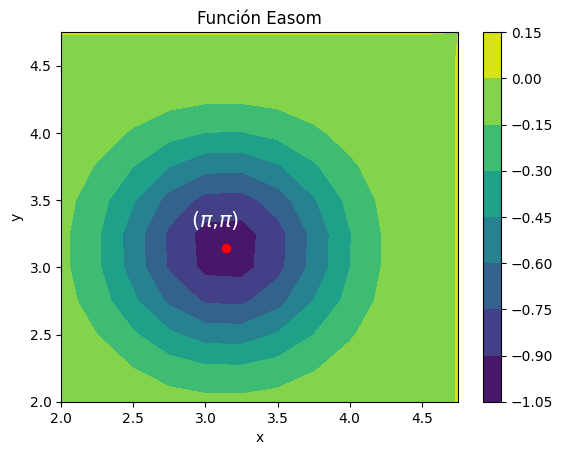

In [14]:
# Graficamos la gráfica de contorno de la función de la Esom


import numpy as np

import matplotlib.pyplot as plt
from matplotlib import ticker, cm

import pandas as pd 
import math 

# Función a minimizar
def f_easom(X):
  x,y = X
  return -1*math.cos(x)*math.cos(y)*math.exp(-1*( (x - math.pi )**2 + (y - math.pi)**2))

# Generamos valores para Y y X.
X = np.arange(2, 5, 0.25)
Y = np.arange(2, 5, 0.25)
X, Y = np.meshgrid(X, Y)

Z = -1*np.cos(X)*np.cos(Y)*np.exp(-1*( (X - math.pi )**2 + (Y - math.pi)**2))

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
ax.set_title('Función Easom')
ax.set_xlabel('x')
ax.set_ylabel('y')

### Agregamos lo mínimos
plt.plot(math.pi, math.pi,color='red',marker='o')

ax.annotate(f'($\pi$,$\pi$)', xy =(2.9,3.3),fontsize=15, color = "white")

plt.show()



In [15]:
# Parámetros comunes a ambos algoritmos

n_poblacion = 300
n_variables = 2
upper_bounds = [5, 5] # [100,100]
lower_bounds = [-5, -5] # [-100, -100]
generaciones = 100

# Parámetros especificos al Genético Binario

precision = 6
pro_cruza = 0.8

# Parámetros especificos a PSO
parametro_social = 0.8
parametro_cognitivo = 0.8
inercia = 0.5

In [16]:
"""
#####################
### GENETICO BINARIO
#####################
"""
x_best_genetico, y_best_genetico, fitness_genetico = genetico_binario(f_easom, n_poblacion, generaciones,
                                                     n_variables, upper_bounds, lower_bounds, 
                                                     precision, pro_cruza)
x_best_genetico

[5, 5]
Evaluación de la población inicial
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 20
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 40
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 60
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 80
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------


[3.1372718892855573, 3.1431024159850125]

In [17]:
"""
############
###   PSO
############
"""

x_best_pso, y_best_pso, fitness_pso  = PSO(f_easom, n_poblacion, generaciones, n_variables, 
                              upper_bounds, lower_bounds, parametro_social, 
                              parametro_cognitivo, inercia)
x_best_pso

-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 20
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 40
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 60
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 80
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------


array([3.14159266, 3.14159266])

Text(0.5, 1.0, 'Comparación de algoritmos de optimización')

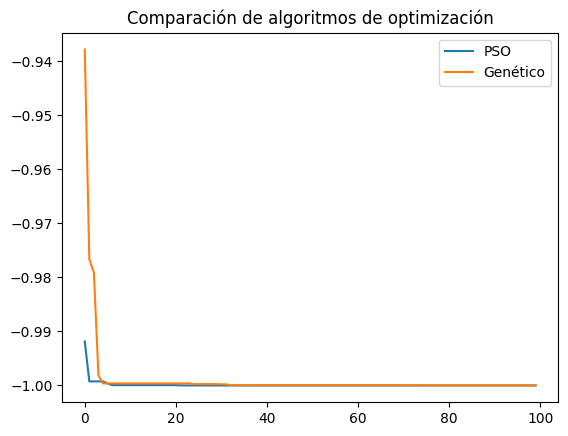

In [18]:
# Comparamos el fitness de los algoritmos
import matplotlib.pyplot as plt 

plt.plot(range(generaciones), fitness_pso, label ="PSO")
plt.plot(range(generaciones), fitness_genetico, label ="Genético")

plt.legend()
plt.title("Comparación de algoritmos de optimización")

In [19]:
# Seleccionamos el mejor vector
min_value = 100000
x_best = None
algo_best = None

for algo,x in zip(["Genético","PSO"],[x_best_genetico,x_best_pso]):
    if f_easom(x) < min_value:
        min_value = f_easom(x)
        x_best = x
        algo_best = algo
print(f"El valor mínimo de la función es {min_value}\nEl mejor vector fue el del algoritmo {algo_best}\nx_best: {x_best}")


El valor mínimo de la función es -1.0
El mejor vector fue el del algoritmo PSO
x_best: [3.14159266 3.14159266]


# Probemos las funciones en la ya conocida función Cross-in-tray

$$
f(x,y) =   -0.0001 [| \sin (x) \ \sin(y)\ \exp\ ( | 100 - \dfrac {\sqrt(x^2 + y^2)} {π} | )| +1] \ ^ 0.1 \
$$

* Mínimos locales:
$$
\begin{align}
	\min \begin{cases} 
      f(1.34941,-1.34941) &= -2.06261 \\
      f(1.34941,1.34941) &=-2.06261 \\
      f(-1.34941,1.34941) &= -2.06261\\
	  f(-1.34941,-1.34941)&=-2.06261
   \end{cases}
\end{align}
$$

* Espacio de búsqueda:

$$
-10 \leq x,y \leq 10
$$


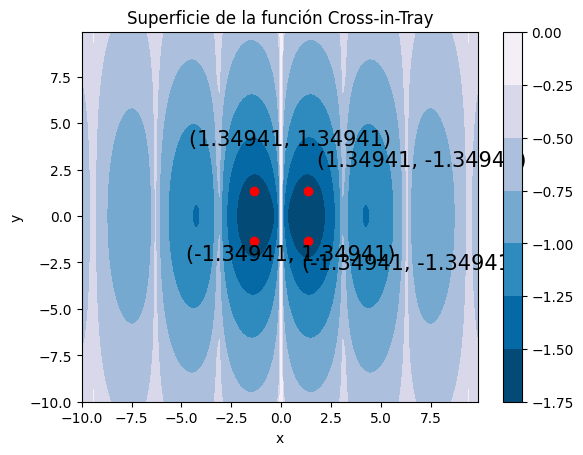

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import math

# Función Cross-in-Tray
def f_cross_in_tray(X):
    x, y = X
    return -0.0001 * abs(np.sin(x) * np.sin(x) * np.exp(abs(100 - np.sqrt(x**2 + y**2))) / np.pi) ** 0.1

# Generamos valores para Y y X.
X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(X, Y)
Z = f_cross_in_tray((X, Y))

fig, ax = plt.subplots(1, 1)
cp = ax.contourf(X, Y, Z, cmap=cm.PuBu_r)
fig.colorbar(cp)

# Agregamos los mínimos
plt.plot(1.34941, -1.34941, color='red', marker='o')
plt.plot(1.34941, 1.34941, color='red', marker='o')
plt.plot(-1.34941, 1.34941, color='red', marker='o')
plt.plot(-1.34941, -1.34941, color='red', marker='o')

ax.annotate('(1.34941, -1.34941)', xy=(1.8, 2.7), fontsize=15)
ax.annotate('(1.34941, 1.34941)', xy=(-4.605118, 3.831312), fontsize=15)
ax.annotate('(-1.34941, 1.34941)', xy=(-4.779310, -2.383186), fontsize=15)
ax.annotate('(-1.34941, -1.34941)', xy=(1.0584428, -2.848126), fontsize=15)

ax.set_title('Superficie de la función Cross-in-Tray')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [22]:
# Parámetros comunes a ambos algoritmos

n_poblacion = 300
n_variables = 2
upper_bounds = [10, 10] # [100,100]
lower_bounds = [-10, -10] # [-100, -100]
generaciones = 100

# Parámetros especificos al Genético Binario

precision = 6
pro_cruza = 0.8

# Parámetros especificos a PSO
parametro_social = 0.8
parametro_cognitivo = 0.8
inercia = 0.5

In [23]:
"""
#####################
### GENETICO BINARIO
#####################
"""
x_best_genetico, y_best_genetico, fitness_genetico = genetico_binario(f_cross_in_tray, n_poblacion, generaciones,
                                                     n_variables, upper_bounds, lower_bounds, 
                                                     precision, pro_cruza)
x_best_genetico

[10, 10]
Evaluación de la población inicial
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 20
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 40
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 60
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 80
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------


[0.9541067765386924, -0.966048567475335]

In [24]:
"""
############
###   PSO
############
"""

x_best_pso, y_best_pso, fitness_pso  = PSO(f_cross_in_tray, n_poblacion, generaciones, n_variables, 
                              upper_bounds, lower_bounds, parametro_social, 
                              parametro_cognitivo, inercia)
x_best_pso

-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 20
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 40
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 60
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 80
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------


array([ 0.95531662, -0.95531661])

Text(0.5, 1.0, 'Comparación de algoritmos de optimización')

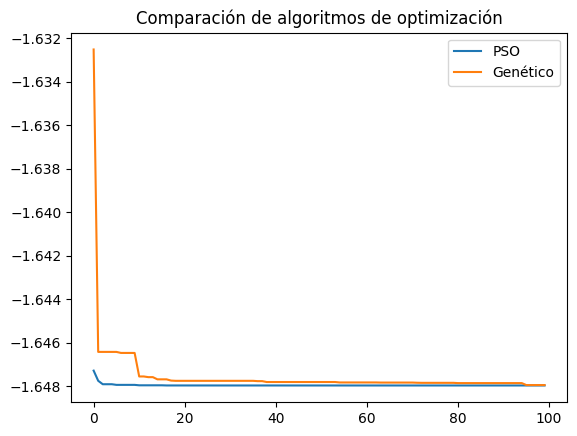

In [25]:
# Comparamos el fitness de los algoritmos
import matplotlib.pyplot as plt 

plt.plot(range(generaciones), fitness_pso, label ="PSO")
plt.plot(range(generaciones), fitness_genetico, label ="Genético")

plt.legend()
plt.title("Comparación de algoritmos de optimización")

In [26]:
# Seleccionamos el mejor vector
min_value = 100000
x_best = None
algo_best = None

for algo,x in zip(["Genético","PSO"],[x_best_genetico,x_best_pso]):
    if f_cross_in_tray(x) < min_value:
        min_value = f_cross_in_tray(x)
        x_best = x
        algo_best = algo
print(f"El valor mínimo de la función es {min_value}\nEl mejor vector fue el del algoritmo {algo_best}\nx_best: {x_best}")


El valor mínimo de la función es -1.6479596663026366
El mejor vector fue el del algoritmo PSO
x_best: [ 0.95531662 -0.95531661]


# Probemos las funciones en la ya conocida función Ackley 

$$
f(x,y) = -20 \exp\ [-0.2 \sqrt (0.5( x^2 + y^2) \  - \exp\ [0.5 \cos 2π x\ + \ 2cos 2π y \\ + e + 20
$$

* Mínimos locales:
$$
\begin{align}
	 \begin{cases} 
      f(0,0) &= 0 
   \end{cases}
\end{align}
$$

* Espacio de búsqueda:

$$
-5 \leq x,y \leq 5
$$

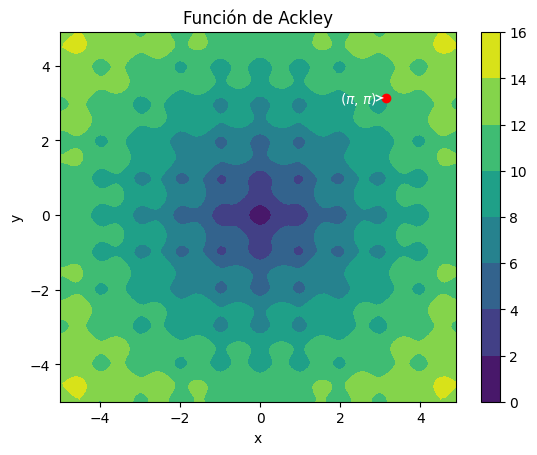

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import math

# Función a minimizar
def f_ackley(X):
    x, y = X
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2*np.pi*x) + np.cos(2*np.pi*y))) + math.e + 20

# Generamos valores para Y y X.
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)

Z = f_ackley((X, Y))

fig, ax = plt.subplots(1, 1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
ax.set_title('Función de Ackley')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Agregamos el mínimo
plt.plot(np.pi, np.pi, color='red', marker='o')
ax.annotate(f'($\pi$, $\pi$)', xy=(np.pi, np.pi), xytext=(2, 3), color='white',
             arrowprops=dict(arrowstyle='->', color='white'))

plt.show()

In [28]:
# Parámetros comunes a ambos algoritmos

n_poblacion = 300
n_variables = 2
upper_bounds = [10, 10] # [100,100]
lower_bounds = [-10, -10] # [-100, -100]
generaciones = 100

# Parámetros especificos al Genético Binario

precision = 6
pro_cruza = 0.8

# Parámetros especificos a PSO
parametro_social = 0.8
parametro_cognitivo = 0.8
inercia = 0.5

In [29]:
"""
#####################
### GENETICO BINARIO
#####################
"""
x_best_genetico, y_best_genetico, fitness_genetico = genetico_binario(f_ackley, n_poblacion, generaciones,
                                                     n_variables, upper_bounds, lower_bounds, 
                                                     precision, pro_cruza)
x_best_genetico

[10, 10]
Evaluación de la población inicial
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 20
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 40
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 60
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 80
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------


[0.002066195072716326, 0.006065070809873063]

In [30]:
"""
############
###   PSO
############
"""

x_best_pso, y_best_pso, fitness_pso  = PSO(f_ackley, n_poblacion, generaciones, n_variables, 
                              upper_bounds, lower_bounds, parametro_social, 
                              parametro_cognitivo, inercia)
x_best_pso

-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 20
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 40
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 60
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 80
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------


array([ 7.10207620e-12, -6.29161961e-12])

Text(0.5, 1.0, 'Comparación de algoritmos de optimización')

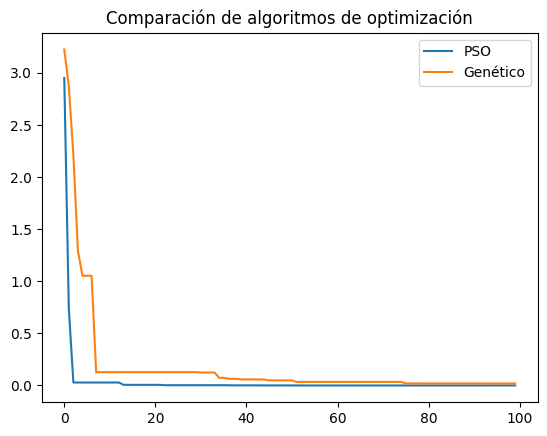

In [31]:
# Comparamos el fitness de los algoritmos
import matplotlib.pyplot as plt 

plt.plot(range(generaciones), fitness_pso, label ="PSO")
plt.plot(range(generaciones), fitness_genetico, label ="Genético")

plt.legend()
plt.title("Comparación de algoritmos de optimización")

In [32]:
# Seleccionamos el mejor vector
min_value = 100000
x_best = None
algo_best = None

for algo,x in zip(["Genético","PSO"],[x_best_genetico,x_best_pso]):
    if f_ackley(x) < min_value:
        min_value = f_ackley(x)
        x_best = x
        algo_best = algo
print(f"El valor mínimo de la función es {min_value}\nEl mejor vector fue el del algoritmo {algo_best}\nx_best: {x_best}")


El valor mínimo de la función es 2.6837199129658984e-11
El mejor vector fue el del algoritmo PSO
x_best: [ 7.10207620e-12 -6.29161961e-12]


# Probemos las funciones en la ya conocida función Booth 

$$
f(x,y) = ( x + 2y - 7) ^2 + (2x + y - 5)^2
$$

* Mínimos locales:
\begin{align}
      f(1, 3) &= 0
\end{align}



 Espacio de búsqueda:

$$
-10 \leq x,y \leq 10
$$

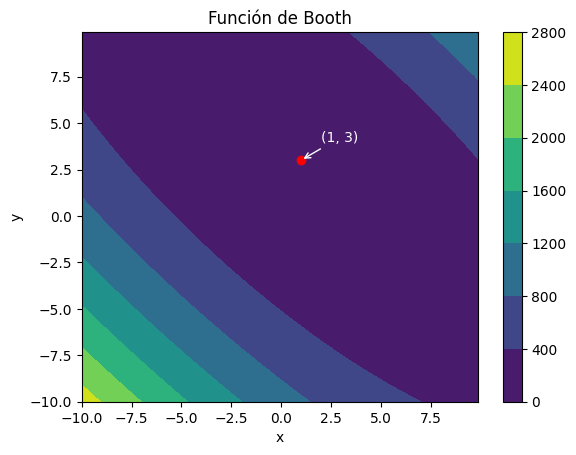

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

# Definir función de Booth
def f_booth(X):
    x, y = X
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

# Generar valores para X y Y
X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(X, Y)

# Calcular valores de Z
Z = f_booth((X, Y))

fig, ax = plt.subplots(1, 1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
ax.set_title('Función de Booth')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Agregamos el mínimo
plt.plot(1, 3, color='red', marker='o')
ax.annotate('(1, 3)', xy=(1, 3), xytext=(2, 4), color='white',
             arrowprops=dict(arrowstyle='->', color='white'))

plt.show()

In [34]:
# Parámetros comunes a ambos algoritmos

n_poblacion = 300
n_variables = 2
upper_bounds = [5, 5] 
lower_bounds = [-5, -5] 
generaciones = 100

# Parámetros especificos al Genético Binario

precision = 6
pro_cruza = 0.8

# Parámetros especificos a PSO
parametro_social = 0.8
parametro_cognitivo = 0.8
inercia = 0.5

In [35]:
"""
#####################
### GENETICO BINARIO
#####################
"""
x_best_genetico, y_best_genetico, fitness_genetico = genetico_binario(f_booth, n_poblacion, generaciones,
                                                     n_variables, upper_bounds, lower_bounds, 
                                                     precision, pro_cruza)
x_best_genetico

[5, 5]
Evaluación de la población inicial
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 20
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 40
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 60
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 80
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------


[0.9213117314166865, 3.051031711759073]

In [36]:
"""
############
###   PSO
############
"""

x_best_pso, y_best_pso, fitness_pso  = PSO(f_booth, n_poblacion, generaciones, n_variables, 
                              upper_bounds, lower_bounds, parametro_social, 
                              parametro_cognitivo, inercia)
x_best_pso

-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 20
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 40
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 60
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 80
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------


array([1., 3.])

Text(0.5, 1.0, 'Comparación de algoritmos de optimización')

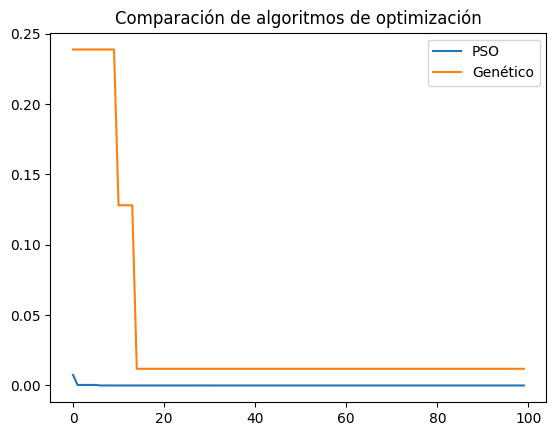

In [37]:
# Comparamos el fitness de los algoritmos
import matplotlib.pyplot as plt 

plt.plot(range(generaciones), fitness_pso, label ="PSO")
plt.plot(range(generaciones), fitness_genetico, label ="Genético")

plt.legend()
plt.title("Comparación de algoritmos de optimización")

In [38]:
# Seleccionamos el mejor vector
min_value = 100000
x_best = None
algo_best = None

for algo,x in zip(["Genético","PSO"],[x_best_genetico,x_best_pso]):
    if f_booth(x) < min_value:
        min_value = f_booth(x)
        x_best = x
        algo_best = algo
print(f"El valor mínimo de la función es {min_value}\nEl mejor vector fue el del algoritmo {algo_best}\nx_best: {x_best}")

El valor mínimo de la función es 6.373367455153187e-22
El mejor vector fue el del algoritmo PSO
x_best: [1. 3.]


# Calibración de modelos climáticos

In [42]:
from algo_optim_mod04.models import EDIAM 

# Cargamos datos de parámetros climáticos
climaticos = pd.read_csv("https://raw.githubusercontent.com/milocortes/mod_04_concentracion/ccm-2023/datos/climaticos/climate_params.csv") 

climaticos

,climate_model,region,beta_delta_temp,co2_base,co2_disaster,delta_temp_disaster,qsi,delta_s,s_0,Yre_N_0,Yce_N_0,Yre_S_0,Yce_S_0
0,CESM2-WACCM,america,5.238091,380.065674,1750.432339,8,0.032838,0.001237,1357.621507,5.57754,60.40765,2.32260,12.14647
1,CESM2-WACCM,eurafrica,5.299541,380.052181,1719.645298,8,0.030342,0.001245,1327.309065,5.14490,61.44841,2.17530,19.22951
2,CESM2-WACCM,asia,5.391266,380.045394,1676.011581,8,0.025260,0.001361,1281.320409,1.52177,16.08911,1.47534,16.05377
3,GFDL-ESM4,america,3.389631,375.991738,3982.663130,8,0.032224,0.000464,3595.476205,5.57754,60.40765,2.32260,12.14647
4,GFDL-ESM4,eurafrica,3.643759,375.985117,3378.153355,8,0.029823,0.000550,2991.417501,5.14490,61.44841,2.17530,19.22951
5,GFDL-ESM4,asia,3.504845,376.009540,3685.529032,8,0.024713,0.000524,3296.437825,1.52177,16.08911,1.47534,16.05377
6,Ensemble,america,4.313861,378.028706,2866.547735,8,0.032531,0.000850,2476.548856,5.57754,60.40765,2.32260,12.14647
7,Ensemble,asia,4.448055,378.027467,2680.770307,8,0.024987,0.000942,2288.879117,1.52177,16.08911,1.47534,16.05377
8,Ensemble,eurafrica,4.471650,378.018649,2548.899327,8,0.030082,0.000897,2159.363283,5.14490,61.44841,2.17530,19.22951
9,Ensemble,world,4.997053,289.415046,1298.216153,8,0.010054,0.001823,915.970085,25.10000,144.90000,9.00000,105.30000


In [43]:
# Intanciamos el modelo
ediam_model = EDIAM("world", "Ensemble",climaticos) 

## Parámetros desconocidos :
## γ_re, k_re, γ_ce, k_ce, η_re, η_ce, ν_re, ν_ce, labor_growth_N, labor_growth_S

salida = ediam_model.run_model([0.05]*10) 
salida

,year,fossil_energy_consumption_advanced_region,fossil_energy_consumption_emerging_region,renewable_energy_consumption_advanced_region,renewable_energy_consumption_emerging_region,delta_temp
0,1980,152.329182,110.698846,26.386905,9.461440,152.329182
1,1981,160.282456,116.308821,27.670200,9.934798,160.282456
2,1982,168.658471,122.205960,29.013328,10.431078,168.658471
3,1983,177.480136,128.405180,30.418920,10.951333,177.480136
4,1984,186.771594,134.922179,31.889725,11.496662,186.771594
5,1985,196.558279,141.773479,33.428620,12.068213,196.558279
6,1986,206.866974,148.976469,35.038613,12.667185,206.866974
7,1987,217.725881,156.549443,36.722858,13.294833,217.725881
8,1988,229.164678,164.511652,38.484660,13.952467,229.164678
9,1989,241.214594,172.883345,40.327488,14.641459,241.214594


<Axes: xlabel='year'>

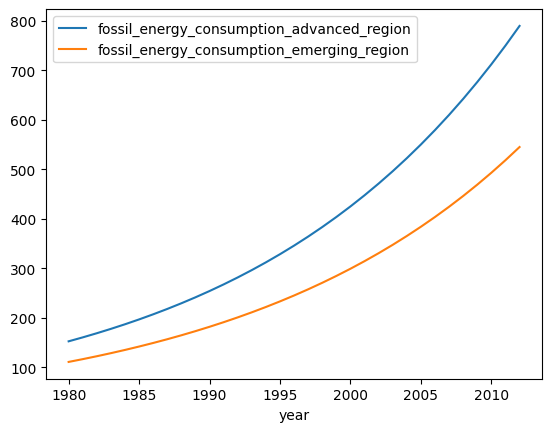

In [44]:
salida[["year","fossil_energy_consumption_advanced_region", 
        "fossil_energy_consumption_emerging_region"]].set_index("year").plot() 

<Axes: xlabel='year'>

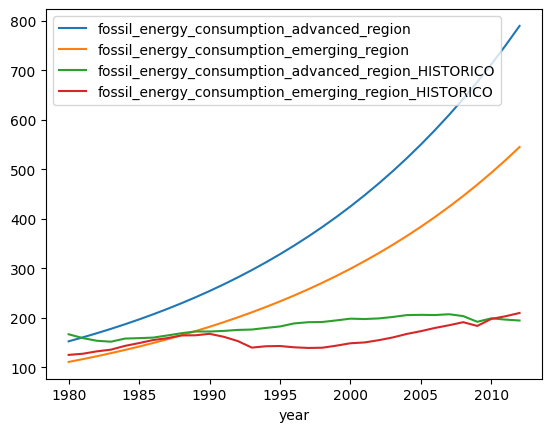

In [45]:
# Cargamos datos de consumo de energías fósil y renovable
energia_consumo = pd.read_csv("https://raw.githubusercontent.com/milocortes/mod_04_concentracion/ccm-2023/datos/climaticos/energy_consumption.csv")

historico_world = energia_consumo.query("energia =='fosil' and region =='world'")[["year","economia","value"]].pivot(index="year", columns='economia', values='value')

historico_world = historico_world.rename(columns={"advanced" : "fossil_energy_consumption_advanced_region_HISTORICO", "emerging" : "fossil_energy_consumption_emerging_region_HISTORICO"}) 


historico_simulado = pd.concat([salida[["year","fossil_energy_consumption_advanced_region", "fossil_energy_consumption_emerging_region"]].set_index("year"), historico_world], axis = 1)

historico_simulado.plot()


In [46]:
# Loss function 
def loss_f_ediam(X):

    salida = ediam_model.run_model(X) 
    
    MSE_avanzada = np.square(salida["fossil_energy_consumption_advanced_region"].to_numpy() - historico_world["fossil_energy_consumption_advanced_region_HISTORICO"].to_numpy()).mean()

    MSE_emergente = np.square(salida["fossil_energy_consumption_emerging_region"].to_numpy() - historico_world["fossil_energy_consumption_emerging_region_HISTORICO"].to_numpy()).mean()

    return MSE_avanzada + MSE_emergente


In [47]:

"""
############
###   PSO
############
"""
# Ejecutamos el algoritmo PSO
# Tamaño de la población
n = 100
# Número de variables
n_var = 10
l_bounds = np.array([0.001]*n_var)
u_bounds = np.array([0.12]*n_var)
generaciones = 60
# Social scaling parameter
α = 0.5
# Cognitive scaling parameter
β = 0.8
# velocity inertia
w = 0.5

x_best_pso, y_best_pso, fitness_pso  = PSO(loss_f_ediam, n, generaciones, n_var, u_bounds, l_bounds, α, β, w)
x_best_pso, y_best_pso

-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 20
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 40
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------


(array([0.12      , 0.001     , 0.001     , 0.03532575, 0.12      ,
        0.001     , 0.001     , 0.001     , 0.01705138, 0.02065075]),
 428.8608542339245)

In [48]:
"""
#####################
### GENETICO BINARIO
#####################
"""

# Parámetros especificos al Genético Binario

precision = 6
pro_cruza = 0.8

x_best_genetico, y_best_genetico, fitness_genetico = genetico_binario(loss_f_ediam, n, generaciones,
                                                     n_var, u_bounds, l_bounds, 
                                                     precision, pro_cruza)
x_best_genetico, y_best_genetico

[0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12]
Evaluación de la población inicial
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 20
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 40
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------


([0.008153382517871993,
  0.03169081642773764,
  0.04627903197503643,
  0.04784789160073548,
  0.007801115425990494,
  0.09808862372302035,
  0.015945022163560207,
  0.06024987220666662,
  0.007136529056770758,
  0.018777685376627936],
 460.4716943787738)

Text(0.5, 1.0, 'Comparación de algoritmos de optimización')

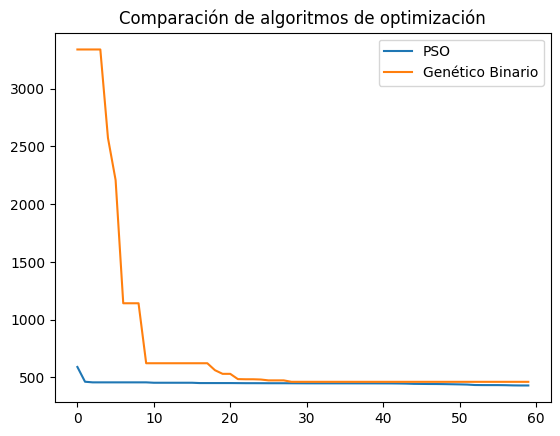

In [49]:
# Comparamos el fitness de los algoritmos
import matplotlib.pyplot as plt 

plt.plot(range(generaciones), fitness_pso, label ="PSO")
plt.plot(range(generaciones), fitness_genetico, label ="Genético Binario")

plt.legend()
plt.title("Comparación de algoritmos de optimización")

In [50]:
# Seleccionamos el mejor vector
min_value = 100000
x_best = None
algo_best = None

for algo,x in zip(["Genético","PSO"],[x_best_genetico,x_best_pso]):
    if loss_f_ediam(x) < min_value:
        min_value = loss_f_ediam(x)
        x_best = x
        algo_best = algo
print(f"El valor mínimo de la función es {min_value}\nEl mejor vector fue el del algoritmo {algo_best}\nx_best: {x_best}")


El valor mínimo de la función es 428.8608542339245
El mejor vector fue el del algoritmo PSO
x_best: [0.12       0.001      0.001      0.03532575 0.12       0.001
 0.001      0.001      0.01705138 0.02065075]


<Axes: xlabel='year'>

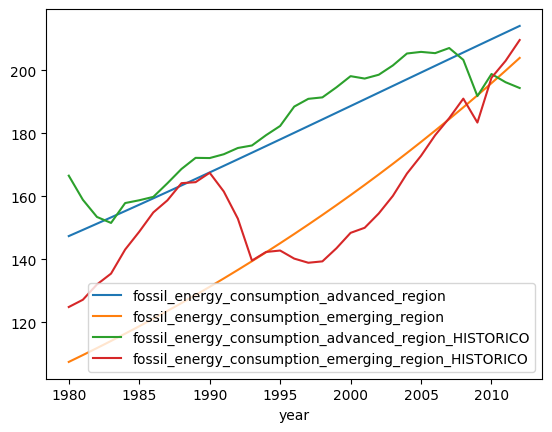

In [51]:
salida = ediam_model.run_model(x_best)
historico_simulado = pd.concat([salida[["year","fossil_energy_consumption_advanced_region", "fossil_energy_consumption_emerging_region"]].set_index("year"), historico_world], axis = 1)

historico_simulado.plot()

In [ ]:
salida

,year,fossil_energy_consumption_advanced_region,fossil_energy_consumption_emerging_region,renewable_energy_consumption_advanced_region,renewable_energy_consumption_emerging_region,delta_temp
0,1980,147.382486,107.466270,25.530023,9.185151,147.382486
1,1981,149.336704,109.659882,26.544189,9.365575,149.336704
2,1982,151.305176,111.897836,27.602644,9.549614,151.305176
3,1983,153.287464,114.181014,28.707483,9.737344,153.287464
4,1984,155.283107,116.510313,29.860894,9.928841,155.283107
5,1985,157.291621,118.886651,31.065168,10.124184,157.291621
6,1986,159.312501,121.310960,32.322694,10.323453,159.312501
7,1987,161.345222,123.784193,33.635965,10.526730,161.345222
8,1988,163.389239,126.307321,35.007579,10.734101,163.389239
9,1989,165.443990,128.881330,36.440244,10.945650,165.443990


<Axes: xlabel='year'>

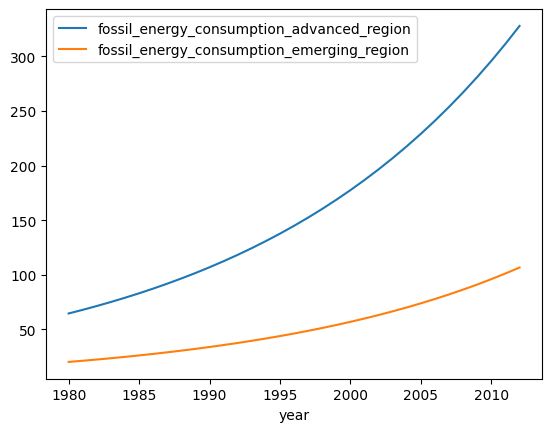

In [57]:
# Cargamos datos de consumo de energías fósil y renovable
energia_consumo = pd.read_csv("https://raw.githubusercontent.com/milocortes/mod_04_concentracion/ccm-2023/datos/climaticos/energy_consumption.csv")

historico_world = energia_consumo.query("energia =='fosil' and region =='eurafrica'")[["year","economia","value"]].pivot(index="year", columns='economia', values='value')

historico_world = historico_world.rename(columns={"advanced" : "fossil_energy_consumption_advanced_region_HISTORICO", "emerging" : "fossil_energy_consumption_emerging_region_HISTORICO"}) 


historico_simulado = pd.concat([salida[["year","fossil_energy_consumption_advanced_region", "fossil_energy_consumption_emerging_region"]].set_index("year"), historico_world], axis = 1)

historico_simulado.plot()

In [58]:
# Loss function 
def loss_f_ediam(X):

    salida = ediam_model.run_model(X) 
    
    MSE_avanzada = np.square(salida["fossil_energy_consumption_advanced_region"].to_numpy() - historico_world["fossil_energy_consumption_advanced_region_HISTORICO"].to_numpy()).mean()

    MSE_emergente = np.square(salida["fossil_energy_consumption_emerging_region"].to_numpy() - historico_world["fossil_energy_consumption_emerging_region_HISTORICO"].to_numpy()).mean()

    return MSE_avanzada + MSE_emergente

In [60]:
"""
############
###   PSO
############
"""
# Ejecutamos el algoritmo PSO
# Tamaño de la población
n = 100
# Número de variables
n_var = 10
l_bounds = np.array([0.001]*n_var)
u_bounds = np.array([0.12]*n_var)
generaciones = 60
# Social scaling parameter
α = 0.5
# Cognitive scaling parameter
β = 0.8
# velocity inertia
w = 0.5

x_best_pso, y_best_pso, fitness_pso  = PSO(loss_f_ediam, n, generaciones, n_var, u_bounds, l_bounds, α, β, w)
x_best_pso, y_best_pso

KeyError: ignored

### EJERCICIO : Calibración del modelo EDIAM  en Macro-Regiones

Calibra el modelo EDIAM para alguna de las siguientes regiones:

* america
* asia
* eurafrica

Calibra el modelo con PSO y Genético Binario. Elige el mejor vector y muestra la gráfica comparando las salidas del modelo versus los resultados históricos.

In [52]:
from algo_optim_mod04.models import EDIAM 

# Cargamos datos de parámetros climáticos
climaticos = pd.read_csv("https://raw.githubusercontent.com/milocortes/mod_04_concentracion/ccm-2023/datos/climaticos/climate_params.csv") 

climaticos

,climate_model,region,beta_delta_temp,co2_base,co2_disaster,delta_temp_disaster,qsi,delta_s,s_0,Yre_N_0,Yce_N_0,Yre_S_0,Yce_S_0
0,CESM2-WACCM,america,5.238091,380.065674,1750.432339,8,0.032838,0.001237,1357.621507,5.57754,60.40765,2.32260,12.14647
1,CESM2-WACCM,eurafrica,5.299541,380.052181,1719.645298,8,0.030342,0.001245,1327.309065,5.14490,61.44841,2.17530,19.22951
2,CESM2-WACCM,asia,5.391266,380.045394,1676.011581,8,0.025260,0.001361,1281.320409,1.52177,16.08911,1.47534,16.05377
3,GFDL-ESM4,america,3.389631,375.991738,3982.663130,8,0.032224,0.000464,3595.476205,5.57754,60.40765,2.32260,12.14647
4,GFDL-ESM4,eurafrica,3.643759,375.985117,3378.153355,8,0.029823,0.000550,2991.417501,5.14490,61.44841,2.17530,19.22951
5,GFDL-ESM4,asia,3.504845,376.009540,3685.529032,8,0.024713,0.000524,3296.437825,1.52177,16.08911,1.47534,16.05377
6,Ensemble,america,4.313861,378.028706,2866.547735,8,0.032531,0.000850,2476.548856,5.57754,60.40765,2.32260,12.14647
7,Ensemble,asia,4.448055,378.027467,2680.770307,8,0.024987,0.000942,2288.879117,1.52177,16.08911,1.47534,16.05377
8,Ensemble,eurafrica,4.471650,378.018649,2548.899327,8,0.030082,0.000897,2159.363283,5.14490,61.44841,2.17530,19.22951
9,Ensemble,world,4.997053,289.415046,1298.216153,8,0.010054,0.001823,915.970085,25.10000,144.90000,9.00000,105.30000


In [54]:
# Intanciamos el modelo
ediam_model = EDIAM("eurafrica", "Ensemble",climaticos) 

## Parámetros desconocidos :
## γ_re, k_re, γ_ce, k_ce, η_re, η_ce, ν_re, ν_ce, labor_growth_N, labor_growth_S

salida = ediam_model.run_model([0.05]*10) 
salida

,year,fossil_energy_consumption_advanced_region,fossil_energy_consumption_emerging_region,renewable_energy_consumption_advanced_region,renewable_energy_consumption_emerging_region,delta_temp
0,1980,64.598937,20.215428,5.408685,2.286830,64.598937
1,1981,67.928954,21.285556,5.677333,2.402687,67.928954
2,1982,71.432434,22.412617,5.958964,2.524316,71.432434
3,1983,75.118580,23.599680,6.254169,2.651993,75.118580
4,1984,78.997100,24.849981,6.563566,2.786007,78.997100
5,1985,83.078230,26.166934,6.887798,2.926662,83.078230
6,1986,87.372765,27.554146,7.227533,3.074273,87.372765
7,1987,91.892091,29.015422,7.583468,3.229168,91.892091
8,1988,96.648215,30.554781,7.956325,3.391690,96.648215
9,1989,101.653802,32.176466,8.346857,3.562197,101.653802


<Axes: xlabel='year'>

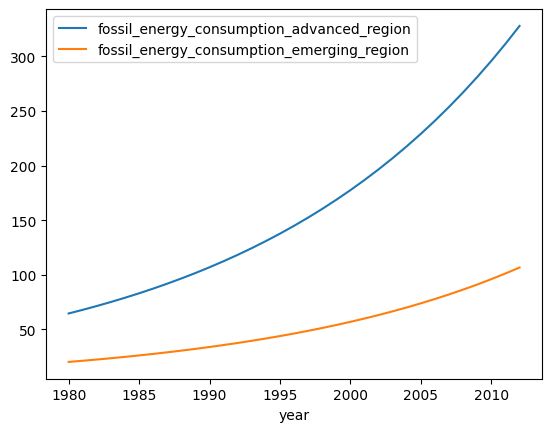

In [55]:
salida[["year","fossil_energy_consumption_advanced_region", 
        "fossil_energy_consumption_emerging_region"]].set_index("year").plot() 

# Ajuste de Hiperparámetros en Modelos de Aprendizaje de Máquina

Algunos modelos de aprendizaje de máquina necesitan definir algunos **parámetros** antes de llevar acabo el aprendizaje. A estos parámetros se les conoce como **hiperparámetros** e influyen en la forma como se realiza el aprendizaje.


Dado que la elección de estos hiperparámetros tiene un impacto considerable en el desempeño de los modelos de aprendizaje de máquina, los científicos de datos dedican una cantidad considerable de tiempo en elegir la mejor combinación de hiperparámetros.

Este proceso se le conoce como **ajuste de hiperparámetros**.

## Wine dataset

El dataset contiene información de resultados químicos aplicados a 178 vinos de una región particular de Italia. Categoriza los vinos en tres tipos.

El análisis químico consiste de 13 distintas medidas como alcohol, intensidad de color, etc. 

In [ ]:
## Wine data set

wine_names = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity","Hue", "OD280/OD315 of diluted wines", "Proline"]
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", names = wine_names)
wine

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Parámetros a ajustar en Gradient Boosting Classifier

Usaremos la implementación de Gradient Boosting Classifier de <code>sklearn</code> ([liga](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)). El clasificador utiliza varios hiperparámetros, de los cuales ajustaremos tres:

* <code>n_estimators</code> : El número de  boosting stages a realizar $[1, \infty)$ (entero).
* <code>learnig_rate</code> : Pondera la contribución contribución de cada árbol $[0.0, \infty)$ (flotante).
* <code>criterion</code> : Método que calcula la calidad de split (<code>friedman_mse</code> , <code>squared_error</code>) (categoría).

Estos hiperparámetros son de distinto tipo (entero, flotante y categoría, respectivamente).

Hemos utilizado los algoritmos bioinspirados para funciones de números reales (<code>[1.23, 7.45, 8.23]</code>).

Para adaptar este enfoque para ajustar hiperparámetros de distinto tipo, vamos a representar cada hiperparámetro como un valor flotante. 

Posteriormente, definimos una forma de transformar cada parámetro a su representación original.

Las transformaciones son las siguientes:

* <code>n_estimators</code> : Redondeamos el valor del parámetro utilizando la función <code>int() </code>.
* <code>learnig_rate</code> : No se requiere transformación.
* <code>criterion</code> : el valor del parámetro utilizando la función <code>int() </code> y lo utilizamos para buscar el valor correspondiente en un diccionario que mapea enteros con las categorías.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X = wine.drop(columns = "class").to_numpy()
y = wine["class"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
clf = GradientBoostingClassifier(n_estimators = 20, learning_rate=0.4, 
                                 loss = "log_loss", criterion="friedman_mse")

cv_results = cross_val_score(clf, X_train, y_train, cv = 5, scoring = "accuracy")

cv_results.mean()

0.9076086956521738

In [ ]:
### Definimos la función a optimizar
def loss_gbc(X):
    
    try:
        criterion_transform = {0 : "friedman_mse", 1 : "squared_error"}

        n_estimators_p = int(X[0])
        learning_rate_p = X[1]
        criterion_p = criterion_transform[int(X[2])]

        clf = GradientBoostingClassifier(n_estimators = n_estimators_p, learning_rate=learning_rate_p, 
                                         loss = "log_loss", criterion=criterion_p, random_state=42)

        cv_results = cross_val_score(clf, X_train, y_train, cv = 5, scoring = "accuracy")

        return -cv_results.mean()
    except:
        return 10e10

In [ ]:
"""
############
###   PSO
############
"""
# Ejecutamos el algoritmo PSO
# Tamaño de la población
n = 10
# Número de variables
n_var = 3
l_bounds = np.array([1, 0, 0])
u_bounds = np.array([30, 20, 2])
generaciones = 10
# Social scaling parameter
α = 0.5
# Cognitive scaling parameter
β = 0.8
# velocity inertia
w = 0.5

x_best_pso, y_best_pso, fitness_pso  = PSO(loss_gbc, n, generaciones, n_var, u_bounds, l_bounds, α, β, w)
x_best_pso, y_best_pso

-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------


(array([6.34717156, 2.89525735, 1.12337263]), -0.9663043478260869)

In [ ]:
"""
#####################
### GENETICO BINARIO
#####################
"""

# Parámetros especificos al Genético Binario

precision = 6
pro_cruza = 0.8

x_best_genetico, y_best_genetico, fitness_genetico = genetico_binario(loss_gbc, n, generaciones,
                                                     n_var, u_bounds, l_bounds, 
                                                     precision, pro_cruza)
x_best_genetico, y_best_genetico

[30 20  2]
Evaluación de la población inicial
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Generación 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------


([27.95047548265682, 3.523752794377589, 0.7838901442957612],
 -0.9409420289855073)

Text(0.5, 1.0, 'Comparación de algoritmos de optimización')

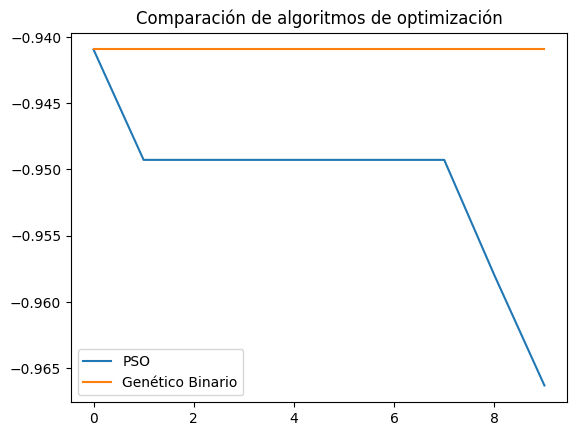

In [ ]:
# Comparamos el fitness de los algoritmos
import matplotlib.pyplot as plt 

plt.plot(range(generaciones), fitness_pso, label ="PSO")
plt.plot(range(generaciones), fitness_genetico, label ="Genético Binario")

plt.legend()
plt.title("Comparación de algoritmos de optimización")

In [ ]:
# Seleccionamos el mejor vector
min_value = 100000
x_best = None
algo_best = None

for algo,x in zip(["Genético","PSO"],[x_best_genetico,x_best_pso]):
    if loss_gbc(x) < min_value:
        min_value = loss_gbc(x)
        x_best = x
        algo_best = algo
print(f"El valor mínimo de la función es {min_value}\nEl mejor vector fue el del algoritmo {algo_best}\nx_best: {x_best}")


El valor mínimo de la función es -0.9663043478260869
El mejor vector fue el del algoritmo PSO
x_best: [6.34717156 2.89525735 1.12337263]


## EJERCICIO:  Heart Disease Data Set

Encuentre el modelo con el mejor accuracy con el clasificador GBC para el conjunto de datos de Heart Disease ([liga](https://archive.ics.uci.edu/ml/datasets/heart+disease)).

La columna <code>target</code> etiqueta como *1* la presencia de cardiopatía y 2 la ausencia de cardiopatía.

Para mejorar el ajuste, puedes agregar uno o más hiperparámetros adicionales para ser ajustados. Visita la siguiente [liga](https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) para elegir el-los hiperparámetros que puedes agregar. 

In [ ]:
## Heart disease data set

hear_disease = pd.read_csv("https://github.com/PacktPublishing/Hands-On-Gradient-Boosting-with-XGBoost-and-Scikit-learn/raw/master/Chapter06/heart_disease.csv")
hear_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
X = hear_disease.drop(columns = "target").to_numpy()
y = hear_disease["target"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = GradientBoostingClassifier(n_estimators = 20, learning_rate=0.4, 
                                 loss = "log_loss", criterion="friedman_mse")

cv_results = cross_val_score(clf, X_train, y_train, cv = 5, scoring = "accuracy")

cv_results.mean()

0.7882926829268293

In [ ]:
### Definimos la función a optimizar
def loss_gbc(X):
    
    try:
        criterion_transform = {0 : "friedman_mse", 1 : "squared_error"}

        n_estimators_p = int(X[0])
        learning_rate_p = X[1]
        criterion_p = criterion_transform[int(X[2])]

        clf = GradientBoostingClassifier(n_estimators = n_estimators_p, learning_rate=learning_rate_p, 
                                         loss = "log_loss", criterion=criterion_p, random_state=42)

        cv_results = cross_val_score(clf, X_train, y_train, cv = 5, scoring = "accuracy")

        return -cv_results.mean()

    except:
        return 10e10

In [ ]:
"""
############
###   PSO
############
"""
# Ejecutamos el algoritmo PSO
# Tamaño de la población
n = 10
# Número de variables
n_var = 3
l_bounds = np.array([1, 0, 0])
u_bounds = np.array([30, 20, 2])
generaciones = 10
# Social scaling parameter
α = 0.5
# Cognitive scaling parameter
β = 0.8
# velocity inertia
w = 0.5

x_best_pso, y_best_pso, fitness_pso  = PSO(loss_gbc, n, generaciones, n_var, u_bounds, l_bounds, α, β, w)
x_best_pso, y_best_pso

-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------


(array([ 1.        , 10.73281106,  0.74462671]), -0.783658536585366)